
# 6. Библиотеки для получения и обработки данных

## 6.2. Модуль pandas

### Теория

pandAs

In [1]:
import numpy as np
import pandas as pd

Два класса объектов Pandas:
- `Series` – одномерный массив, который может хранить значения любого типа данных;
- `DataFrame` – двумерный массив (таблица), в котором столбцами являются объекты класса `Series`.

##### Series() - одномерный массив (аналог словаря Python)

Cоздание объекта класса Series
**s = pd.Series(data, index=index)**
`data` - массив numpy, словарь, число
`index` - список меток осей (число, метки-строки)

In [4]:
# vibo: создание объекта Series из numpy, с созданием индексов
s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
print(s)
print()
# vibo: linspace - начало, конец, количество точек
# vibo: индексы по умолчанию от 0 до len(data)-1
s = pd.Series(np.linspace(0, 1, 5))
print(s)

a    0
b    1
c    2
d    3
e    4
dtype: int64

0    0.00
1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64


In [6]:
# vibo: создание объекта Series из словаря
# vibo: ключи словаря по дефолту используются как индексы строк
d = {"a": 10, "b": 20, "c": 30, "g": 40}
print(pd.Series(d))
print()
# vibo: если индекса нет в исходном словаре, поле заполняется NaN
print(pd.Series(d, index=["a", "b", "c", "d"]))

a    10
b    20
c    30
g    40
dtype: int64

a    10.0
b    20.0
c    30.0
d     NaN
dtype: float64


**`NaN` – стандартное обозначение отсутствия данных в библиотеке pandas**

In [2]:
# vibo: создание объекта Series из числа
# vibo: ИНДЕКСЫ ОБЯЗАТЕЛЬНЫ
index = ["a", "b", "c"]
print(pd.Series(5, index=index))

a    5
b    5
c    5
dtype: int64


In [8]:
s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
print("Выбор одного элемента")
print(s["a"])
print("Выбор нескольких элементов")
print(s[["a", "d"]])
print("Срез")
print(s[1:])
print("Поэлементное сложение")
print(s + s)

Выбор одного элемента
0
Выбор нескольких элементов
a    0
d    3
dtype: int64
Срез
b    1
c    2
d    3
e    4
dtype: int64
Поэлементное сложение
a    0
b    2
c    4
d    6
e    8
dtype: int64


In [9]:
# vibo: фильтрация по условию
s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
print("Фильтрация")
print(s[s > 2])

Фильтрация
d    3
e    4
dtype: int64


In [10]:
s = pd.Series(np.arange(5), index=["a", "b", "c", "d", "e"])
# vibo: атрибут - имя набора данных
s.name = "Данные"
# vibo: имена для индексов
s.index.name = "Индекс"
print(s)

Индекс
a    0
b    1
c    2
d    3
e    4
Name: Данные, dtype: int64


##### DataFrame() - двумерный массив

In [3]:
# vibo: создание DatsFrame() из словаря Python
students_marks_dict = {"student": ["Студент_1", "Студент_2", "Студент_3"],
                       "math": [5, 3, 4],
                       "physics": [4, 5, 5]}
students = pd.DataFrame(students_marks_dict)
print(students)

     student  math  physics
0  Студент_1     5        4
1  Студент_2     3        5
2  Студент_3     4        5


In [12]:
# vibo: индексы по строкам (по умолчанию)
print(students.index)
# vibo: индексы по столбцам
print(students.columns)

RangeIndex(start=0, stop=3, step=1)
Index(['student', 'math', 'physics'], dtype='object')


In [13]:
# vibo: меняем индексы по строкам на буквы
students.index = ["A", "B", "C"]
print(students)

     student  math  physics
A  Студент_1     5        4
B  Студент_2     3        5
C  Студент_3     4        5


In [15]:
# vibo: срез по строковой метке
print(students.loc["B":])

     student  math  physics
B  Студент_2     3        5
C  Студент_3     4        5


In [17]:
# vibo: столбцы объекта DataFrame являются объектами класса Series
print(type(students["student"]))

<class 'pandas.core.series.Series'>


##### Работа с файлами

Получение и запись датасета:
- **CSV (Comma Separated Values)**:
-- Функция `read_csv()`, аргумент `file` - строка, в которой записан путь до файла;
-- Метод `to_csv(file)`, для записи данных из DataFrame в CSV-файл;
- **Excel**:
-- `read_excel()`;
-- `to_excel()` - для записи данных из `DataFrame`;
- **JSON**:
-- `read_json()`;
-- `to_json()` - для записи данных из `DataFrame`.

In [5]:
import numpy as np
import pandas as pd

# vibo: расположение и имя файла передается строкой
students = pd.read_csv("Students_Performance.csv")

In [10]:
# vibo: вывод первых пяти строк датасета
# print(students.head())
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# vibo: последние три записи
# print(students.tail(3))
students.tail(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


##### Срезы

In [12]:
# vibo: срез по индексам строк
# print(students[10:13])
students[10:13]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
12,female,group B,high school,standard,none,65,81,73


In [15]:
# vibo: индексация с условием фильтрации данных
# print(students[students["test preparation course"] == "completed"]["math score"].head())
# vibo: 5 первых результатов по математике из тех, кто прошел подготовительные курсы
students[students["test preparation course"] == "completed"]["math score"].head()

1     69
6     88
8     64
13    78
18    46
Name: math score, dtype: int64

##### Сортировка

In [23]:
# vibo: предыдущий запрос с сортировкой (ascending=False для сортировки по убыванию)
# vibo: 5 лучших результатов по трем дисциплинам (по убыванию) для предыдущей выборки (те, кто прошел подготовительные курсы)

# vibo: выборка тех, кто прошел подготовительные курсы
with_course = students[students["test preparation course"] == "completed"]
# print(with_course[["math score",
#                    "reading score",
#                    "writing score"]].sort_values(["math score",
#                                                   "reading score",
#                                                   "writing score"], ascending=False).head())
# vibo: работаем с новой выборкой
with_course[['math score',
             'reading score',
             'writing score']].sort_values(['math score',
                                            'reading score',
                                            'writing score'], ascending=False).head()

,math score,reading score,writing score
916,100,100,100
149,100,100,93
625,100,97,99
623,100,96,86
114,99,100,100


##### Добавление колонки

In [27]:
# vibo: создаем дополнительный столбец total score
# vibo: выберем лучших по сумме баллов за три дисциплины

# vibo: создаем новый столбец с результирующими данными
students["total score"] = students["math score"] + students["reading score"] + students["writing score"]

# print(students.sort_values(["total score"], ascending=False).head())
students.sort_values(["total score"], ascending=False).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297


##### assign()

In [30]:
# vibo: добавить колонку - метод assign(), при помощи лямбда-функции
scores = students.assign(total_score=lambda x: x["math score"] + x["reading score"] + x["writing score"])
# print(scores.sort_values(["total_score"], ascending=False).head())
scores.sort_values(["total_score"], ascending=False).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,total_score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300,300
962,female,group E,associate's degree,standard,none,100,100,100,300,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,299
179,female,group D,some high school,standard,completed,97,100,100,297,297


##### Группировка и агрегация

In [32]:
# vibo: groupby() и count()
# print(students.groupby(["gender", "test preparation course"])["writing score"].count())
students.groupby(["gender", "test preparation course"])["writing score"].count()

gender  test preparation course
female  completed                  184
        none                       334
male    completed                  174
        none                       308
Name: writing score, dtype: int64

##### agg()

In [35]:
agg_functions = {"math score": ["mean", "median"]}
# print(students.groupby(["gender", "test preparation course"]).agg(agg_functions))

# vibo: для агрегации используем метод agg
# vibo: в agg передаем словарь с ключами - названиями столбцов
# vibo: значения по ключам могут быть списками функций агрегации
students.groupby(["gender", "test preparation course"]).agg(agg_functions)

math score       
                                     mean median
gender test preparation course                  
female completed                67.195652   67.0
       none                     61.670659   62.0
male   completed                72.339080   73.0
       none                     66.688312   67.0

##### Визуализация

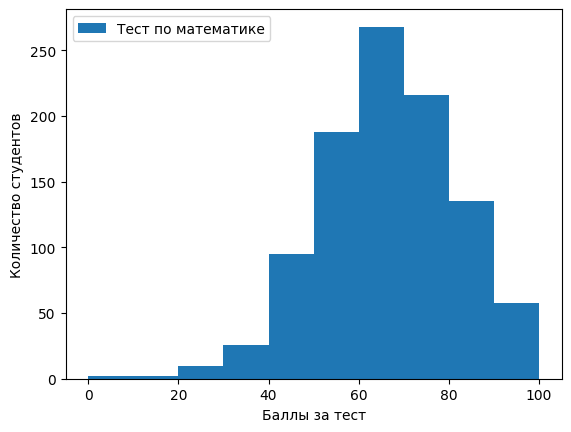

In [37]:
import matplotlib.pyplot as plt

plt.hist(students["math score"], label="Тест по математике")
plt.xlabel("Баллы за тест")
plt.ylabel("Количество студентов")
plt.legend()
plt.show()

### Практика 9/10

In [54]:
# A ПОЛНОЕ РЕШЕНИЕ
import pandas as pd


def length_stats(string):
    # vibo: переводим строку в нижний регистр, делим по пробелам
    string = string.lower().split()
    # vibo: проходим по строке, словам, оставляя только буквы
    string = ["".join([y for y in x if y.isalpha()]) for x in string]
    # vibo: преобразуем в словарь
    dct = {i: len(i) for i in string}
    # vibo: делаем лексикографическом порядок
    ans = pd.Series(dct).sort_index()
    # vibo: условие фильтрации для пропуска - "" (остается от отдельностоящей цифры)
    return ans[ans.index != ""]

# vibo: Пример 1
print(length_stats('Мама 7 мыла, раму'))

# vibo: Пример 2
print(length_stats('Лес, опушка, странный домик. Лес, опушка и зверушка.'))

мама    4
мыла    4
раму    4
dtype: int64
домик       5
зверушка    8
и           1
лес         3
опушка      6
странный    8
dtype: int64


In [57]:
# B ПОЛНОЕ РЕШЕНИЕ
import pandas as pd


def length_stats(string):
    # vibo: переводим строку в нижний регистр, делим по пробелам
    string = string.lower().split()
    # vibo: проходим по строке, словам, оставляя только буквы
    string = ["".join([y for y in x if y.isalpha()]) for x in string]
    # vibo: преобразуем в словарь
    dct = {i: len(i) for i in string}
    # vibo: делаем лексикографическом порядок
    ans = pd.Series(dct).sort_index()
    # vibo: условие фильтрации для пропуска - "" (остается от отдельностоящей цифры)
    ans = ans[ans.index != ""]
    # vibo: разбиваем на нечетные и четные длины слов
    ans_odd, ans_even = ans[ans.values % 2 != 0], ans[ans.values % 2 == 0]
    return ans_odd, ans_even

# vibo: Пример 1
odd, even = length_stats('Мама мыла раму')
print(odd)
print(even)

# vibo: Пример 2
odd, even = length_stats('Лес, опушка, странный домик. Лес, опушка и зверушка.')
print(odd)
print(even)

Series([], dtype: int64)
мама    4
мыла    4
раму    4
dtype: int64
домик    5
и        1
лес      3
dtype: int64
зверушка    8
опушка      6
странный    8
dtype: int64


In [132]:
# C ПОЛНОЕ РЕШЕНИЕ
import pandas as pd


# vibo: принимаем прайс-лист в Series() и словарь с заказом (kwargs)
def cheque(price_list, **kwargs):
    # vibo: из прайс-листа оставляем только позиции из заказа
    cheque_price = pd.DataFrame(price_list, index=kwargs.keys())
    # vibo: создаем пустой чек
    total = pd.DataFrame()
    # vibo: добавляем product и price из Series()
    total["product"] = cheque_price.index
    total["price"] = cheque_price.values
    # vibo: добавляем столбец с количеством
    total["number"] = pd.Series(kwargs.values())
    # vibo: сумма по позициям
    total["cost"] = total["price"] * total["number"]
    # vibo: делаем сортировку по позициям
    total = total.sort_values("product")
    # vibo: сбрасываем индексацию строк
    total.index = pd.Series(range(0, len(total)))
    return total


# vibo: Пример
products = ['bread', 'milk', 'soda', 'cream']
prices = [37, 58, 99, 72]
price_list = pd.Series(prices, products)
result = cheque(price_list, soda=3, milk=2, cream=1)
print(result)

  product  price  number  cost
0   cream     72       1    72
1    milk     58       2   116
2    soda     99       3   297


In [7]:
# D
# vibo: Акция! При покупке больше двух товаров — скидка 50%
# vibo: мелкий шрифт: скидка распространяется только на товары купленные в количестве более двух штук
import pandas as pd
import numpy as np


def cheque(price_list, **kwargs):
    # vibo: из прайс-листа оставляем только позиции из заказа
    cheque_price = pd.DataFrame(price_list, index=kwargs.keys())
    # vibo: создаем пустой чек
    total = pd.DataFrame()
    # vibo: добавляем product и price из Series()
    total["product"] = cheque_price.index
    total["price"] = cheque_price.values
    # vibo: добавляем столбец с количеством
    total["number"] = pd.Series(kwargs.values())
    # vibo: сумма по позициям
    total["cost"] = total["price"] * total["number"]
    # vibo: делаем сортировку по позициям
    total = total.sort_values("product")
    # vibo: сбрасываем индексацию строк
    total.index = pd.Series(range(0, len(total)))
    return total


def discount(result):
    new_result = result.copy()
    # new_result["cost"][new_result["number"] > 2] = result["cost"][result["number"] > 2] * 0.5
    new_result["cost"] = np.where(new_result["number"] > 2, new_result["cost"] * 0.5, new_result["cost"])
    return new_result


# vibo: Пример
products = ['bread', 'milk', 'soda', 'cream']
prices = [37, 58, 99, 72]
price_list = pd.Series(prices, products)

result = cheque(price_list, soda=3, milk=2, cream=1)
with_discount = discount(result)
print(result)
print(with_discount)


  product  price  number  cost
0   cream     72       1    72
1    milk     58       2   116
2    soda     99       3   297
  product  price  number   cost
0   cream     72       1   72.0
1    milk     58       2  116.0
2    soda     99       3  148.5


In [9]:
# E ПОЛНОЕ РЕШЕНИЕ
# vibo: фильтрация pd.Series по длине слова
import pandas as pd


def get_long(data, min_length=5):
    return data[data.values >= min_length]


# vibo: Пример 1.
data = pd.Series([3, 5, 6, 6], ['мир', 'питон', 'привет', 'яндекс'])
filtered = get_long(data)
print(data)
print(filtered)

# vibo: Пример 2.
data = pd.Series([3, 5, 6, 6], ['мир', 'питон', 'привет', 'яндекс'])
filtered = get_long(data, min_length=6)
print(data)
print(filtered)

мир       3
питон     5
привет    6
яндекс    6
dtype: int64
питон     5
привет    6
яндекс    6
dtype: int64
мир       3
питон     5
привет    6
яндекс    6
dtype: int64
привет    6
яндекс    6
dtype: int64


In [2]:
# vibo: вне зачета

import pandas as pd


def div(journal):
    # vibo: set_index() для смены индекса на заданный столбец
    new_journal = journal.set_index("name")
    # vibo: div() доля оценки в общей сумме
    new_journal = new_journal.div(new_journal.sum(axis=1), axis = 0)
    return new_journal

# vibo: Пример
columns = ['name', 'maths', 'physics', 'computer science']
data = {
    'name': ['Иванов', 'Петров', 'Сидоров', 'Васечкин', 'Николаев'],
    'maths': [5, 4, 5, 2, 4],
    'physics': [4, 4, 4, 5, 5],
    'computer science': [5, 2, 5, 4, 3]
}
journal = pd.DataFrame(data, columns=columns)
filtered = div(journal)
print(journal)
print(filtered)

       name  maths  physics  computer science
0    Иванов      5        4                 5
1    Петров      4        4                 2
2   Сидоров      5        4                 5
3  Васечкин      2        5                 4
4  Николаев      4        5                 3
             maths   physics  computer science
name                                          
Иванов    0.357143  0.285714          0.357143
Петров    0.400000  0.400000          0.200000
Сидоров   0.357143  0.285714          0.357143
Васечкин  0.181818  0.454545          0.363636
Николаев  0.333333  0.416667          0.250000


In [3]:
# F ПОЛНОЕ РЕШЕНИЕ
import pandas as pd


def best(journal):
    new_journal = journal.copy()
    # vibo: проверяем наличие оценки >3 в строках, заполняем новый столбец True/False
    pre_score = [x > 3 for x in new_journal[["maths", "physics", "computer science"]].values]
    new_journal["score_>3"] = [all(y) for y in pre_score]
    # vibo: приводим новый столбец к str, иначе было не выполнить фильтрацию по True
    # vibo: чекер по PEP8 требовал заменить == на is, но данная конструкция не работала
    new_journal = new_journal.astype({"score_>3": str})
    new_journal = new_journal[new_journal["score_>3"] == "True"]
    new_journal = new_journal[["name", "maths", "physics", "computer science"]]
    return new_journal

# vibo: Пример
columns = ['name', 'maths', 'physics', 'computer science']
data = {
    'name': ['Иванов', 'Петров', 'Сидоров', 'Васечкин', 'Николаев'],
    'maths': [5, 4, 5, 2, 4],
    'physics': [4, 4, 4, 5, 5],
    'computer science': [5, 2, 5, 4, 3]
}
journal = pd.DataFrame(data, columns=columns)
filtered = best(journal)
print(journal)
print(filtered)

       name  maths  physics  computer science
0    Иванов      5        4                 5
1    Петров      4        4                 2
2   Сидоров      5        4                 5
3  Васечкин      2        5                 4
4  Николаев      4        5                 3
      name  maths  physics  computer science
0   Иванов      5        4                 5
2  Сидоров      5        4                 5


In [73]:
# G ПОЛНОЕ РЕШЕНИЕ
import pandas as pd


def need_to_work_better(journal):
    new_journal = journal.copy()
    # vibo: проверяем наличие оценки 2 в строках, заполняем новый столбец True/False
    new_journal["score_2"] = [2 in x for x in new_journal[["maths", "physics", "computer science"]].values]
    # vibo: приводим новый столбец к str, иначе было не выполнить фильтрацию по True
    # vibo: чекер по PEP8 требовал заменить == на is, но данная конструкция не работала
    new_journal = new_journal.astype({"score_2": str})
    new_journal = new_journal[new_journal["score_2"] == "True"]
    new_journal = new_journal[["name", "maths", "physics", "computer science"]]
    return new_journal


# vibo: Пример
columns = ['name', 'maths', 'physics', 'computer science']
data = {
    'name': ['Иванов', 'Петров', 'Сидоров', 'Васечкин', 'Николаев'],
    'maths': [5, 4, 5, 2, 4],
    'physics': [4, 4, 4, 5, 5],
    'computer science': [5, 2, 5, 4, 3]
}
journal = pd.DataFrame(data, columns=columns)
filtered = need_to_work_better(journal)
print(journal)
print(filtered)

       name  maths  physics  computer science
0    Иванов      5        4                 5
1    Петров      4        4                 2
2   Сидоров      5        4                 5
3  Васечкин      2        5                 4
4  Николаев      4        5                 3
       name  maths  physics  computer science
1    Петров      4        4                 2
3  Васечкин      2        5                 4


In [113]:
# H ПОЛНОЕ РЕШЕНИЕ
import pandas as pd


def update(journal):
    new_journal = journal.copy()
    # vibo: при использовании .sum и .count "NaN" не считаются
    # vibo: параметром указываем оси вдоль которых считаем
    new_journal["average"] = new_journal[["maths", "physics", "computer science"]].sum(axis=1) / \
        new_journal[["maths", "physics", "computer science"]].count(axis=1)
    # vibo: двойная сортировка
    new_journal = new_journal.sort_values(["average", "name"], ascending=(False, True))
    return new_journal


columns = ['name', 'maths', 'physics', 'computer science']
data = {
    'name': ['Иванов', 'Петров', 'Сидоров', 'Васечкин', 'Николаев'],
    'maths': [5, 4, 5, 2, 4],
    'pysics': [4, 4, 4, 5, 5],
    'computer science': [5, 2, 5, 4, 3]
}
journal = pd.DataFrame(data, columns=columns)
filtered = update(journal)
print(journal)
print(filtered)


       name  maths physics  computer science
0    Иванов      5     NaN                 5
1    Петров      4     NaN                 2
2   Сидоров      5     NaN                 5
3  Васечкин      2     NaN                 4
4  Николаев      4     NaN                 3
       name  maths physics  computer science  average
0    Иванов      5     NaN                 5      5.0
2   Сидоров      5     NaN                 5      5.0
4  Николаев      4     NaN                 3      3.5
3  Васечкин      2     NaN                 4      3.0
1    Петров      4     NaN                 2      3.0


In [36]:
# I ПОЛНОЕ РЕШЕНИЕ
import pandas as pd


df = pd.read_csv("data.csv")

# vibo: верхний левый
a_x, a_y = input().split()
# vibo: правый нижний
b_x, b_y = input().split()

# vibo: TLE на тесте-18
# df = df[df["x"] >= int(a_x)]
# df = df[df["x"] <= int(b_x)]
# df = df[df["y"] <= int(a_y)]
# df = df[df["y"] >= int(b_y)]

df = df[(df["x"] >= int(a_x)) & (df["x"] <= int(b_x)) & (df["y"] <= int(a_y)) & (df["y"] >= int(b_y))]

print(df)

         x   y
6262     9   0
59060   10   4
69882   10   5
72739    0   0
120951   3   1
137931   9  10
183595   7   0
194157   0   9
219910   0   3
220920  10   0
242318   8   4
283651   1   8
292990   4   3
294474   6   3
352959  10  10
393223   3   5
423449   1   2
